In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [85]:
data = pd.read_csv('../dataset/house_pricing.csv')

In [86]:
data.head(5)

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        814 non-null    object 
 1   Type        814 non-null    object 
 2   Beds        814 non-null    int64  
 3   Baths       814 non-null    int64  
 4   SquareFeet  814 non-null    int64  
 5   Price       814 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 38.3+ KB


In [88]:
data.drop(['Type'], inplace = True, axis = 1)

In [89]:
data.head(2)

,City,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,2,1,836,138159.85
1,SACRAMENTO,3,1,1167,167541.46


In [90]:
city = data['City'].unique()
city

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [91]:
x = LabelEncoder()
city_label = x.fit_transform(data['City'])

In [92]:
city_label

array([31, 31, 31, 31, 31, 31, 31, 31, 26, 28, 31, 31, 31, 31, 31, 31, 28,
        4, 31, 28,  4, 31, 21, 31, 21,  0, 31, 31, 31, 31,  9, 21, 31, 10,
        9, 31, 21, 31, 31, 31, 31, 31,  9,  0, 21, 31, 31, 31, 31, 31,  9,
       31, 31, 31, 31, 13, 31, 31,  3, 31,  0, 13, 22, 13, 31, 31,  9,  0,
       31, 31,  9, 12,  3, 31, 31,  9, 31,  9,  9, 31, 26,  4, 31, 31, 19,
       28,  9, 31, 31,  9,  4,  9,  3,  9, 31,  9, 31, 31, 31, 25, 31, 31,
       31, 25, 31, 31,  9,  9,  9, 31, 31,  9,  9, 14, 31,  9, 31, 26, 31,
       22,  9,  9, 12,  9, 31,  9, 31, 27, 35,  9, 31, 31,  0, 31,  9, 16,
        9, 31,  9, 26, 12,  9,  9,  9, 12, 31,  4, 31,  9, 31, 31, 31, 31,
       31, 31, 31, 31, 31,  9, 31,  9, 13, 31, 21, 31, 26, 31, 31, 21, 31,
       10, 21, 31, 31, 31, 31, 13, 11, 31, 31, 31, 31, 21, 31, 31, 31, 31,
        9,  4, 31,  9, 31,  4, 31,  0, 31, 31, 26, 31, 31,  0,  9,  9, 26,
        9,  3,  4, 31,  0, 31, 31, 31, 31, 24,  4,  4, 31, 31, 31,  9, 31,
       28, 20, 11,  9, 31

In [93]:
data['CityLabel'] = city_label

In [94]:
data

,City,Beds,Baths,SquareFeet,Price,CityLabel
0,SACRAMENTO,2,1,836,138159.85,31
1,SACRAMENTO,3,1,1167,167541.46,31
2,SACRAMENTO,2,1,796,119095.12,31
3,SACRAMENTO,2,1,852,130904.95,31
4,SACRAMENTO,2,1,797,120266.19,31
...,...,...,...,...,...,...
809,SACRAMENTO,4,3,2280,308248.47,31
810,SACRAMENTO,3,2,1477,212857.63,31
811,CITRUS HEIGHTS,3,2,1216,181746.98,4
812,ELK GROVE,4,2,1685,245385.59,9


In [95]:
data.drop(['City'], inplace = True, axis = 1)

In [96]:
data

,Beds,Baths,SquareFeet,Price,CityLabel
0,2,1,836,138159.85,31
1,3,1,1167,167541.46,31
2,2,1,796,119095.12,31
3,2,1,852,130904.95,31
4,2,1,797,120266.19,31
...,...,...,...,...,...
809,4,3,2280,308248.47,31
810,3,2,1477,212857.63,31
811,3,2,1216,181746.98,4
812,4,2,1685,245385.59,9


In [97]:
data.columns.to_list()

['Beds', 'Baths', 'SquareFeet', 'Price', 'CityLabel']

In [98]:
x = data[['Beds', 'Baths', 'SquareFeet']]
scaling = StandardScaler()
X = scaling.fit_transform(x)
y = data['Price']

In [99]:
data.head(2)

,Beds,Baths,SquareFeet,Price,CityLabel
0,2,1,836,138159.85,31
1,3,1,1167,167541.46,31


<AxesSubplot:xlabel='CityLabel', ylabel='Price'>

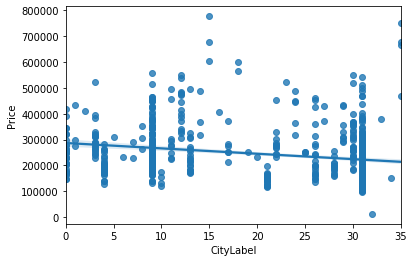

In [100]:
sns.regplot(x='CityLabel',y='Price',data=data)

<AxesSubplot:>

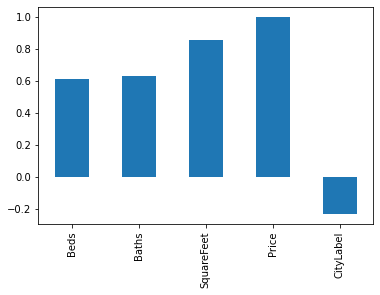

In [101]:
data.corrwith(data['Price']).plot(kind='bar')

In [102]:
# xtest, ytest, xtrain, ytrain = train_test_split(x,y,test_size=.2)

In [142]:
re = cross_val_score(LinearRegression(), x, y, cv = 5)
re.mean() * 100

69.71848962342989

In [143]:
re = cross_val_score(DecisionTreeRegressor(), x, y, cv = 5)
re.mean() * 100

53.69510076023509

In [144]:
re = cross_val_score(RandomForestRegressor(), x, y, cv = 5)
re.mean() * 100

65.72532936049585

In [145]:
re = cross_val_score(KNeighborsRegressor(), x, y, cv = 5)
re.mean() * 100

70.11065508552157

In [146]:
re = cross_val_score(SVR(), x, y, cv = 5)
re.mean() * 100

-7.2963006820341265

In [147]:
KNeighborsRegressor?

Init signature:
KNeighborsRegressor(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are furth

In [177]:
params = {
    'n_neighbors':[5,10,15,20,25,45,75],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[40,50,50,80],
    'p':[1,2]
}
model = KNeighborsRegressor()
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=True)

In [178]:
grid

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [40, 50, 50, 80],
                         'n_neighbors': [5, 10, 15, 20, 25, 45, 75],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=True)

In [188]:
grid.fit(x,y)

Fitting 3 folds for each of 448 candidates, totalling 1344 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1344 out of 1344 | elapsed:    4.0s finished


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [40, 50, 50, 80],
                         'n_neighbors': [5, 10, 15, 20, 25, 45, 75],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=True)

In [180]:
df  = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004745,0.000666,0.012134,0.005967,auto,40,5,1,uniform,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.777399,0.763862,0.615969,0.719077,0.073117,340
1,0.007031,0.001467,0.006904,0.001682,auto,40,5,1,distance,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.759466,0.747095,0.592653,0.699738,0.075889,420
2,0.005399,0.000908,0.005412,0.000756,auto,40,5,2,uniform,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.778737,0.758295,0.613167,0.716733,0.073706,376
3,0.008910,0.006956,0.006911,0.004052,auto,40,5,2,distance,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.762747,0.745340,0.589093,0.699060,0.078083,433
4,0.004393,0.000140,0.004349,0.000146,auto,40,10,1,uniform,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.787298,0.765025,0.624616,0.725647,0.072015,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.003851,0.000122,0.010740,0.001165,brute,80,45,2,distance,"{'algorithm': 'brute', 'leaf_size': 80, 'n_nei...",0.810043,0.745601,0.646479,0.734041,0.067273,184
444,0.003708,0.000186,0.010620,0.001155,brute,80,75,1,uniform,"{'algorithm': 'brute', 'leaf_size': 80, 'n_nei...",0.832178,0.687108,0.646081,0.721789,0.079834,298
445,0.003665,0.000143,0.010053,0.000215,brute,80,75,1,distance,"{'algorithm': 'brute', 'leaf_size': 80, 'n_nei...",0.820610,0.729707,0.657116,0.735811,0.066885,129
446,0.004147,0.000436,0.011266,0.000952,brute,80,75,2,uniform,"{'algorithm': 'brute', 'leaf_size': 80, 'n_nei...",0.832052,0.687026,0.646120,0.721733,0.079775,308


In [181]:
grid.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=40, n_neighbors=25)

In [182]:
model = grid.best_estimator_

In [183]:
data['prediction'] = model.predict(x)

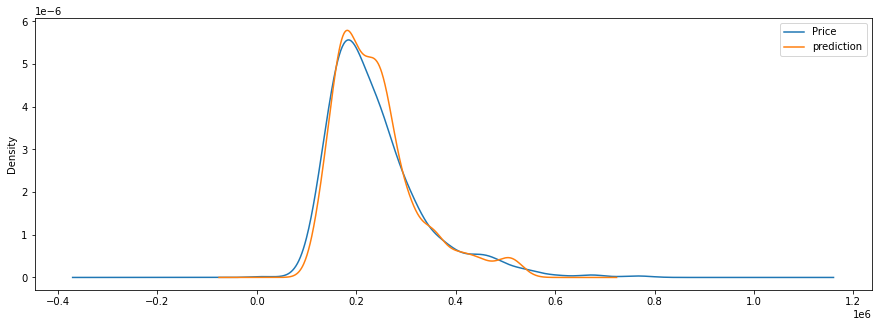

In [184]:
ax=data['Price'].plot(kind='kde',figsize=(15,5))
data['prediction'].plot(kind='kde',figsize=(15,5), ax = ax)
plt.legend()
plt.show()